<a href="https://colab.research.google.com/github/agus-triono08/Sentiment-Childfree-Using-SVM-Support-Vector-Machines-Tfidf-Smote-Oversampling-UnderSampling-and-BOW/blob/main/MainTask/Sentimen_Childfree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mengimport Data

In [1]:
import pandas as pd
from google.colab import files
filenya = files.upload()

Saving Childfree-all-mentions.csv to Childfree-all-mentions.csv


In [2]:
# Load dataset
def load_data():
    data = pd.read_csv('./Childfree-all-mentions.csv')
    return data

In [3]:
tweet_df = load_data()
tweet_df

,No,Type,Mentions,Date,Link,Media,Sentiment,Author,Followers,Comments,Likes,Shares,Retweeted,Replied,Favourited
0,1,mention,Pengen banget gw gulai rahim penganut sekte ch...,2023-03-15 05:00:46,https://twitter.com/web/statuses/1635762924009...,Twitter,Negative,@ygman90s (yogaymjd),153,0,0,0,0,0,0
1,2,rt,"RT @f_gilik yak bagus, video ini semakin meneg...",2023-03-15 04:55:00,https://twitter.com/web/statuses/1635761470255...,Twitter,Positive,@TheLegitimateP1 (Courier 74 Ã°ÂŸÂ‡ÂµÃ°ÂŸÂ‡Â¸),33,0,0,0,0,0,0
2,3,rt,"RT @leinad_28 @tanyakanrl Nanti alesannya ""Rez...",2023-03-15 04:42:27,https://twitter.com/web/statuses/1635758312196...,Twitter,Negative,@shtttshut (Ã¢Â«Â Ã¢ÂƒÂ¢Ã°ÂŸÂ‘ÂÃœÂ«Ã°ÂŸÂ‘ÂÃ¢ÂƒÂ¢),6,0,0,0,0,0,0
3,4,rt,RT @SoundOfYogi: Video anti childfree tapi isi...,2023-03-15 04:39:59,https://twitter.com/web/statuses/1635757691498...,Twitter,Negative,@randydewanggaa (Randy Dewangga),899,0,0,0,0,0,0
4,5,rt,RT @SoundOfYogi: Video anti childfree tapi isi...,2023-03-15 04:36:51,https://twitter.com/web/statuses/1635756905112...,Twitter,Negative,@adeptusmiaow (capek farming momiji),51,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,rt,RT @AREAJULID Orang yang notabennya hidup terc...,2023-02-26 10:14:09,https://twitter.com/web/statuses/1629681196073...,Twitter,Positive,@DewiFricilia1 (si ayang),27,0,0,0,0,0,0
4996,4997,rt,RT @KhodamNaruto: Seharusnya bapak ini childfr...,2023-02-26 10:13:54,https://twitter.com/web/statuses/1629681133234...,Twitter,Negative,@crynptr25 (crynss),691,0,0,0,0,0,0
4997,4998,mention,Tapi madara kan childfree,2023-02-26 10:12:38,https://twitter.com/web/statuses/1629680812747...,Twitter,Positive,@imevkxi (READY FOR EXOÃ¢Â€Â™s ACTIVITIES Ã¢ÂÂ...,452,0,0,0,0,0,0
4998,4999,rt,RT @KhodamNaruto: Seharusnya bapak ini childfr...,2023-02-26 10:12:22,https://twitter.com/web/statuses/1629680748063...,Twitter,Negative,@riydlus (rekti),9,0,0,0,0,0,0


In [4]:
tweet_df = pd.DataFrame(tweet_df[['Date', 'Author', 'Mentions', 'Sentiment']])
tweet_df

,Date,Author,Mentions,Sentiment
0,2023-03-15 05:00:46,@ygman90s (yogaymjd),Pengen banget gw gulai rahim penganut sekte ch...,Negative
1,2023-03-15 04:55:00,@TheLegitimateP1 (Courier 74 Ã°ÂŸÂ‡ÂµÃ°ÂŸÂ‡Â¸),"RT @f_gilik yak bagus, video ini semakin meneg...",Positive
2,2023-03-15 04:42:27,@shtttshut (Ã¢Â«Â Ã¢ÂƒÂ¢Ã°ÂŸÂ‘ÂÃœÂ«Ã°ÂŸÂ‘ÂÃ¢ÂƒÂ¢),"RT @leinad_28 @tanyakanrl Nanti alesannya ""Rez...",Negative
3,2023-03-15 04:39:59,@randydewanggaa (Randy Dewangga),RT @SoundOfYogi: Video anti childfree tapi isi...,Negative
4,2023-03-15 04:36:51,@adeptusmiaow (capek farming momiji),RT @SoundOfYogi: Video anti childfree tapi isi...,Negative
...,...,...,...,...
4995,2023-02-26 10:14:09,@DewiFricilia1 (si ayang),RT @AREAJULID Orang yang notabennya hidup terc...,Positive
4996,2023-02-26 10:13:54,@crynptr25 (crynss),RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative
4997,2023-02-26 10:12:38,@imevkxi (READY FOR EXOÃ¢Â€Â™s ACTIVITIES Ã¢ÂÂ...,Tapi madara kan childfree,Positive
4998,2023-02-26 10:12:22,@riydlus (rekti),RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative


In [5]:
tweet_df.drop(tweet_df.columns[[0,1]], axis = 1, inplace = True)
tweet_df

,Mentions,Sentiment
0,Pengen banget gw gulai rahim penganut sekte ch...,Negative
1,"RT @f_gilik yak bagus, video ini semakin meneg...",Positive
2,"RT @leinad_28 @tanyakanrl Nanti alesannya ""Rez...",Negative
3,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative
4,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative
...,...,...
4995,RT @AREAJULID Orang yang notabennya hidup terc...,Positive
4996,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative
4997,Tapi madara kan childfree,Positive
4998,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative


#Pre-Processing Cleaning

In [6]:
import numpy as np
import re
# remove user
def remove_user(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
tweet_df['Mentions_remove_user'] = np.vectorize(remove_user)(tweet_df['Mentions'], "@[\w]*")
tweet_df

,Mentions,Sentiment,Mentions_remove_user
0,Pengen banget gw gulai rahim penganut sekte ch...,Negative,Pengen banget gw gulai rahim penganut sekte ch...
1,"RT @f_gilik yak bagus, video ini semakin meneg...",Positive,"RT yak bagus, video ini semakin menegaskan ba..."
2,"RT @leinad_28 @tanyakanrl Nanti alesannya ""Rez...",Negative,"RT Nanti alesannya ""Rezeki mah ada aja, seka..."
3,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative,RT : Video anti childfree tapi isinya contoh o...
4,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative,RT : Video anti childfree tapi isinya contoh o...
...,...,...,...
4995,RT @AREAJULID Orang yang notabennya hidup terc...,Positive,RT Orang yang notabennya hidup tercukupi memi...
4996,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative,RT : Seharusnya bapak ini childfree https://t....
4997,Tapi madara kan childfree,Positive,Tapi madara kan childfree
4998,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative,RT : Seharusnya bapak ini childfree https://t....


In [7]:
import unicodedata
# cleaning
def cleaning(strMentions):
    #remove non-ascii
    strMentions = unicodedata.normalize('NFKD', strMentions).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    #remove URLs
    strMentions = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', strMentions)

    #remove punctuations
    strMentions = re.sub(r'[^\w]|_',' ',strMentions)

    #remove digit from string
    strMentions = re.sub("\S*\d\S*", "", strMentions).strip()

    #remove digit or numbers
    strMentions = re.sub(r"\b\d+\b", " ", strMentions)

    #Remove additional white spaces
    strMentions = re.sub('[\s]+', ' ', strMentions)

    #remove rt
    strMentions = re.sub(r'^RT[\s]+', '', strMentions)

    #remove tab, new line, and backslice
    strMentions = strMentions.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")

    # remove whitespace leading & trailing
    strMentions = strMentions.strip()

    # remove multiple whitespace into single whitespace
    strMentions = re.sub('\s+',' ',strMentions)

    # remove single character
    strMentions = re.sub(r"\b[a-zA-Z]\b", "", strMentions)

    return strMentions
tweet_df['Mentions_cleaning'] = tweet_df['Mentions_remove_user'].apply(cleaning)
tweet_df

,Mentions,Sentiment,Mentions_remove_user,Mentions_cleaning
0,Pengen banget gw gulai rahim penganut sekte ch...,Negative,Pengen banget gw gulai rahim penganut sekte ch...,Pengen banget gw gulai rahim penganut sekte ch...
1,"RT @f_gilik yak bagus, video ini semakin meneg...",Positive,"RT yak bagus, video ini semakin menegaskan ba...",yak bagus video ini semakin menegaskan bahwa c...
2,"RT @leinad_28 @tanyakanrl Nanti alesannya ""Rez...",Negative,"RT Nanti alesannya ""Rezeki mah ada aja, seka...",Nanti alesannya Rezeki mah ada aja sekarang mu...
3,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative,RT : Video anti childfree tapi isinya contoh o...,Video anti childfree tapi isinya contoh yg ora...
4,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative,RT : Video anti childfree tapi isinya contoh o...,Video anti childfree tapi isinya contoh yg ora...
...,...,...,...,...
4995,RT @AREAJULID Orang yang notabennya hidup terc...,Positive,RT Orang yang notabennya hidup tercukupi memi...,Orang yang notabennya hidup tercukupi memilih ...
4996,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative,RT : Seharusnya bapak ini childfree https://t....,Seharusnya bapak ini childfree RE KhodamNaruto
4997,Tapi madara kan childfree,Positive,Tapi madara kan childfree,Tapi madara kan childfree
4998,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative,RT : Seharusnya bapak ini childfree https://t....,Seharusnya bapak ini childfree RE KhodamNaruto


#Pre-Processing Casefolding

In [8]:
# casefolding
def caseFolding(s):
    newStrTweetCaseFold = s.lower()

    return newStrTweetCaseFold
tweet_df['Mentions_case_folding'] = tweet_df['Mentions_cleaning'].apply(caseFolding)
tweet_df

,Mentions,Sentiment,Mentions_remove_user,Mentions_cleaning,Mentions_case_folding
0,Pengen banget gw gulai rahim penganut sekte ch...,Negative,Pengen banget gw gulai rahim penganut sekte ch...,Pengen banget gw gulai rahim penganut sekte ch...,pengen banget gw gulai rahim penganut sekte ch...
1,"RT @f_gilik yak bagus, video ini semakin meneg...",Positive,"RT yak bagus, video ini semakin menegaskan ba...",yak bagus video ini semakin menegaskan bahwa c...,yak bagus video ini semakin menegaskan bahwa c...
2,"RT @leinad_28 @tanyakanrl Nanti alesannya ""Rez...",Negative,"RT Nanti alesannya ""Rezeki mah ada aja, seka...",Nanti alesannya Rezeki mah ada aja sekarang mu...,nanti alesannya rezeki mah ada aja sekarang mu...
3,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative,RT : Video anti childfree tapi isinya contoh o...,Video anti childfree tapi isinya contoh yg ora...,video anti childfree tapi isinya contoh yg ora...
4,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative,RT : Video anti childfree tapi isinya contoh o...,Video anti childfree tapi isinya contoh yg ora...,video anti childfree tapi isinya contoh yg ora...
...,...,...,...,...,...
4995,RT @AREAJULID Orang yang notabennya hidup terc...,Positive,RT Orang yang notabennya hidup tercukupi memi...,Orang yang notabennya hidup tercukupi memilih ...,orang yang notabennya hidup tercukupi memilih ...
4996,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative,RT : Seharusnya bapak ini childfree https://t....,Seharusnya bapak ini childfree RE KhodamNaruto,seharusnya bapak ini childfree re khodamnaruto
4997,Tapi madara kan childfree,Positive,Tapi madara kan childfree,Tapi madara kan childfree,tapi madara kan childfree
4998,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative,RT : Seharusnya bapak ini childfree https://t....,Seharusnya bapak ini childfree RE KhodamNaruto,seharusnya bapak ini childfree re khodamnaruto


#Pre-Processing Tokenizing

In [9]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
# tokenizing
def tweetTokenization(s):
    tokens = word_tokenize(s)

    return tokens
tweet_df['Mentions_tokenization'] = tweet_df['Mentions_case_folding'].apply(tweetTokenization)
tweet_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Mentions,Sentiment,Mentions_remove_user,Mentions_cleaning,Mentions_case_folding,Mentions_tokenization
0,Pengen banget gw gulai rahim penganut sekte ch...,Negative,Pengen banget gw gulai rahim penganut sekte ch...,Pengen banget gw gulai rahim penganut sekte ch...,pengen banget gw gulai rahim penganut sekte ch...,"[pengen, banget, gw, gulai, rahim, penganut, s..."
1,"RT @f_gilik yak bagus, video ini semakin meneg...",Positive,"RT yak bagus, video ini semakin menegaskan ba...",yak bagus video ini semakin menegaskan bahwa c...,yak bagus video ini semakin menegaskan bahwa c...,"[yak, bagus, video, ini, semakin, menegaskan, ..."
2,"RT @leinad_28 @tanyakanrl Nanti alesannya ""Rez...",Negative,"RT Nanti alesannya ""Rezeki mah ada aja, seka...",Nanti alesannya Rezeki mah ada aja sekarang mu...,nanti alesannya rezeki mah ada aja sekarang mu...,"[nanti, alesannya, rezeki, mah, ada, aja, seka..."
3,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative,RT : Video anti childfree tapi isinya contoh o...,Video anti childfree tapi isinya contoh yg ora...,video anti childfree tapi isinya contoh yg ora...,"[video, anti, childfree, tapi, isinya, contoh,..."
4,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative,RT : Video anti childfree tapi isinya contoh o...,Video anti childfree tapi isinya contoh yg ora...,video anti childfree tapi isinya contoh yg ora...,"[video, anti, childfree, tapi, isinya, contoh,..."
...,...,...,...,...,...,...
4995,RT @AREAJULID Orang yang notabennya hidup terc...,Positive,RT Orang yang notabennya hidup tercukupi memi...,Orang yang notabennya hidup tercukupi memilih ...,orang yang notabennya hidup tercukupi memilih ...,"[orang, yang, notabennya, hidup, tercukupi, me..."
4996,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative,RT : Seharusnya bapak ini childfree https://t....,Seharusnya bapak ini childfree RE KhodamNaruto,seharusnya bapak ini childfree re khodamnaruto,"[seharusnya, bapak, ini, childfree, re, khodam..."
4997,Tapi madara kan childfree,Positive,Tapi madara kan childfree,Tapi madara kan childfree,tapi madara kan childfree,"[tapi, madara, kan, childfree]"
4998,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative,RT : Seharusnya bapak ini childfree https://t....,Seharusnya bapak ini childfree RE KhodamNaruto,seharusnya bapak ini childfree re khodamnaruto,"[seharusnya, bapak, ini, childfree, re, khodam..."


#Pre-Processing Stopword

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# stopwords
list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(["dg", "ny","d", "klo",
                      "amp", "krn", "n", 'u', 'jd', "nyg",
                       "hehe", "nder", "der", "pen", "sis", "jg",
                       "bgt", 'dah', 'ni', 'so', 'x', 'ri', 'dos', 'eee',
                       'skrng', 'skr', 'kpd', 'j', 's', 'b', 'jgn2', 'gara2',
                       'utk', 'y', 'g', 'm', 'pm', 't', 'dm', 'rm', 'p', 'indonesi', 'https',
                       'ampe', 'rt'
                      ])

list_stopwords = set(list_stopwords)

def removeStopwords(words):
    return ' '.join([word for word in words if word not in list_stopwords])
tweet_df['Mentions_stopwords'] = tweet_df['Mentions_tokenization'].apply(removeStopwords)
tweet_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Mentions,Sentiment,Mentions_remove_user,Mentions_cleaning,Mentions_case_folding,Mentions_tokenization,Mentions_stopwords
0,Pengen banget gw gulai rahim penganut sekte ch...,Negative,Pengen banget gw gulai rahim penganut sekte ch...,Pengen banget gw gulai rahim penganut sekte ch...,pengen banget gw gulai rahim penganut sekte ch...,"[pengen, banget, gw, gulai, rahim, penganut, s...",pengen banget gw gulai rahim penganut sekte ch...
1,"RT @f_gilik yak bagus, video ini semakin meneg...",Positive,"RT yak bagus, video ini semakin menegaskan ba...",yak bagus video ini semakin menegaskan bahwa c...,yak bagus video ini semakin menegaskan bahwa c...,"[yak, bagus, video, ini, semakin, menegaskan, ...",yak bagus video childfree pilihan yg mencegah ...
2,"RT @leinad_28 @tanyakanrl Nanti alesannya ""Rez...",Negative,"RT Nanti alesannya ""Rezeki mah ada aja, seka...",Nanti alesannya Rezeki mah ada aja sekarang mu...,nanti alesannya rezeki mah ada aja sekarang mu...,"[nanti, alesannya, rezeki, mah, ada, aja, seka...",alesannya rezeki mah aja mumpung finansial bag...
3,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative,RT : Video anti childfree tapi isinya contoh o...,Video anti childfree tapi isinya contoh yg ora...,video anti childfree tapi isinya contoh yg ora...,"[video, anti, childfree, tapi, isinya, contoh,...",video anti childfree isinya contoh yg orangtua...
4,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative,RT : Video anti childfree tapi isinya contoh o...,Video anti childfree tapi isinya contoh yg ora...,video anti childfree tapi isinya contoh yg ora...,"[video, anti, childfree, tapi, isinya, contoh,...",video anti childfree isinya contoh yg orangtua...
...,...,...,...,...,...,...,...
4995,RT @AREAJULID Orang yang notabennya hidup terc...,Positive,RT Orang yang notabennya hidup tercukupi memi...,Orang yang notabennya hidup tercukupi memilih ...,orang yang notabennya hidup tercukupi memilih ...,"[orang, yang, notabennya, hidup, tercukupi, me...",orang notabennya hidup tercukupi memilih child...
4996,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative,RT : Seharusnya bapak ini childfree https://t....,Seharusnya bapak ini childfree RE KhodamNaruto,seharusnya bapak ini childfree re khodamnaruto,"[seharusnya, bapak, ini, childfree, re, khodam...",childfree re khodamnaruto
4997,Tapi madara kan childfree,Positive,Tapi madara kan childfree,Tapi madara kan childfree,tapi madara kan childfree,"[tapi, madara, kan, childfree]",madara childfree
4998,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative,RT : Seharusnya bapak ini childfree https://t....,Seharusnya bapak ini childfree RE KhodamNaruto,seharusnya bapak ini childfree re khodamnaruto,"[seharusnya, bapak, ini, childfree, re, khodam...",childfree re khodamnaruto


#Melakukan pengambilan data yang telah dilakukan pre processing

In [11]:
tweet_df['Mentions_cleans'] = tweet_df['Mentions_stopwords']
tweet_df

,Mentions,Sentiment,Mentions_remove_user,Mentions_cleaning,Mentions_case_folding,Mentions_tokenization,Mentions_stopwords,Mentions_cleans
0,Pengen banget gw gulai rahim penganut sekte ch...,Negative,Pengen banget gw gulai rahim penganut sekte ch...,Pengen banget gw gulai rahim penganut sekte ch...,pengen banget gw gulai rahim penganut sekte ch...,"[pengen, banget, gw, gulai, rahim, penganut, s...",pengen banget gw gulai rahim penganut sekte ch...,pengen banget gw gulai rahim penganut sekte ch...
1,"RT @f_gilik yak bagus, video ini semakin meneg...",Positive,"RT yak bagus, video ini semakin menegaskan ba...",yak bagus video ini semakin menegaskan bahwa c...,yak bagus video ini semakin menegaskan bahwa c...,"[yak, bagus, video, ini, semakin, menegaskan, ...",yak bagus video childfree pilihan yg mencegah ...,yak bagus video childfree pilihan yg mencegah ...
2,"RT @leinad_28 @tanyakanrl Nanti alesannya ""Rez...",Negative,"RT Nanti alesannya ""Rezeki mah ada aja, seka...",Nanti alesannya Rezeki mah ada aja sekarang mu...,nanti alesannya rezeki mah ada aja sekarang mu...,"[nanti, alesannya, rezeki, mah, ada, aja, seka...",alesannya rezeki mah aja mumpung finansial bag...,alesannya rezeki mah aja mumpung finansial bag...
3,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative,RT : Video anti childfree tapi isinya contoh o...,Video anti childfree tapi isinya contoh yg ora...,video anti childfree tapi isinya contoh yg ora...,"[video, anti, childfree, tapi, isinya, contoh,...",video anti childfree isinya contoh yg orangtua...,video anti childfree isinya contoh yg orangtua...
4,RT @SoundOfYogi: Video anti childfree tapi isi...,Negative,RT : Video anti childfree tapi isinya contoh o...,Video anti childfree tapi isinya contoh yg ora...,video anti childfree tapi isinya contoh yg ora...,"[video, anti, childfree, tapi, isinya, contoh,...",video anti childfree isinya contoh yg orangtua...,video anti childfree isinya contoh yg orangtua...
...,...,...,...,...,...,...,...,...
4995,RT @AREAJULID Orang yang notabennya hidup terc...,Positive,RT Orang yang notabennya hidup tercukupi memi...,Orang yang notabennya hidup tercukupi memilih ...,orang yang notabennya hidup tercukupi memilih ...,"[orang, yang, notabennya, hidup, tercukupi, me...",orang notabennya hidup tercukupi memilih child...,orang notabennya hidup tercukupi memilih child...
4996,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative,RT : Seharusnya bapak ini childfree https://t....,Seharusnya bapak ini childfree RE KhodamNaruto,seharusnya bapak ini childfree re khodamnaruto,"[seharusnya, bapak, ini, childfree, re, khodam...",childfree re khodamnaruto,childfree re khodamnaruto
4997,Tapi madara kan childfree,Positive,Tapi madara kan childfree,Tapi madara kan childfree,tapi madara kan childfree,"[tapi, madara, kan, childfree]",madara childfree,madara childfree
4998,RT @KhodamNaruto: Seharusnya bapak ini childfr...,Negative,RT : Seharusnya bapak ini childfree https://t....,Seharusnya bapak ini childfree RE KhodamNaruto,seharusnya bapak ini childfree re khodamnaruto,"[seharusnya, bapak, ini, childfree, re, khodam...",childfree re khodamnaruto,childfree re khodamnaruto


#Menghapus attribut kolom yang tidak digunakan

In [12]:
#buang kolom yg tidak digunakan
tweet_df.drop(tweet_df.columns[[0,2,3,4,5,6]], axis = 1, inplace = True)
tweet_df

,Sentiment,Mentions_cleans
0,Negative,pengen banget gw gulai rahim penganut sekte ch...
1,Positive,yak bagus video childfree pilihan yg mencegah ...
2,Negative,alesannya rezeki mah aja mumpung finansial bag...
3,Negative,video anti childfree isinya contoh yg orangtua...
4,Negative,video anti childfree isinya contoh yg orangtua...
...,...,...
4995,Positive,orang notabennya hidup tercukupi memilih child...
4996,Negative,childfree re khodamnaruto
4997,Positive,madara childfree
4998,Negative,childfree re khodamnaruto


#Menghapus data mentions yang duplikat

In [13]:
tweet_df.drop_duplicates(subset = "Mentions_cleans", keep = "first", inplace=True)
tweet_df

,Sentiment,Mentions_cleans
0,Negative,pengen banget gw gulai rahim penganut sekte ch...
1,Positive,yak bagus video childfree pilihan yg mencegah ...
2,Negative,alesannya rezeki mah aja mumpung finansial bag...
3,Negative,video anti childfree isinya contoh yg orangtua...
5,Negative,childfree
...,...,...
4959,Positive,penjelasan segi sains sih moral menurun anak c...
4964,Negative,khusus setuju childfree
4985,Positive,anak negara yg ditolong hukum yg ketat support...
4991,Positive,tinggal kenangan tp gpp drpd taeyong stres ngu...


#Menyimpan semua hasil dari proses pre-processing

In [14]:
tweet_df.to_excel('./childfree-cleaning.xlsx', encoding='utf8', index=True)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


#**Analisis Data Chilfree**

#Import package library yang digunakan

In [15]:
import pandas as pd
import numpy as np
import re
import joblib
import pickle
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_excel('./childfree-cleaning.xlsx')

In [17]:
df.drop(df.columns[[0]], axis= 1,inplace=True)
df

,Sentiment,Mentions_cleans
0,Negative,pengen banget gw gulai rahim penganut sekte ch...
1,Positive,yak bagus video childfree pilihan yg mencegah ...
2,Negative,alesannya rezeki mah aja mumpung finansial bag...
3,Negative,video anti childfree isinya contoh yg orangtua...
4,Negative,childfree
...,...,...
1838,Positive,penjelasan segi sains sih moral menurun anak c...
1839,Negative,khusus setuju childfree
1840,Positive,anak negara yg ditolong hukum yg ketat support...
1841,Positive,tinggal kenangan tp gpp drpd taeyong stres ngu...


#Visualisasi bar-chart jumlah data tweet positif, neutral dan negatif

In [18]:
tweet_bar_df = df['Sentiment'].value_counts()
print(f'index: {tweet_bar_df.index}')
print(f'values: {tweet_bar_df.values}')
print(f'all_values: {tweet_bar_df.sum()}')

index: Index(['Positive', 'Negative', 'Neutral'], dtype='object')
values: [1074  421  348]
all_values: 1843


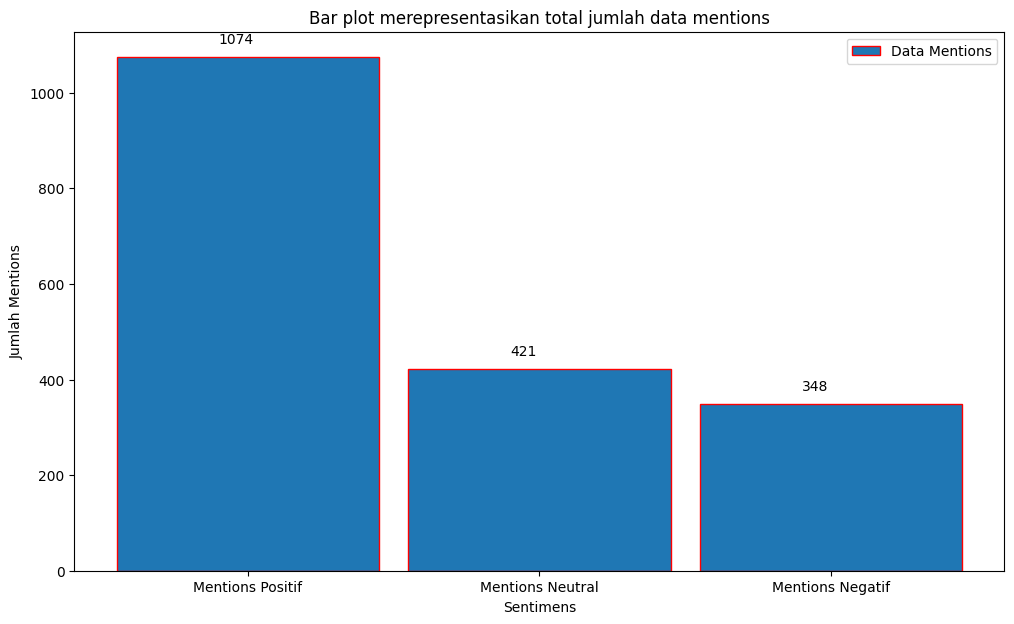

In [19]:
plt.figure(figsize = (12,7))

sentimen = ['Mentions Positif', "Mentions Neutral" , 'Mentions Negatif']
plt.bar(sentimen, tweet_bar_df.values, align='center',  edgecolor = 'red', width= 0.9)


i = 1.0
j = 30

for i in range(len(sentimen)):
    plt.annotate(tweet_bar_df.values[i], (-0.1 + i, tweet_bar_df.values[i] + j))


plt.legend(labels = ['Data Mentions'])


plt.title("Bar plot merepresentasikan total jumlah data mentions")


plt.xlabel('Sentimens')
plt.ylabel('Jumlah Mentions')

# plt.savefig('barplot-tweet.png')

plt.show()

#Visualisasi pie-chart terhadap sentimen mentions

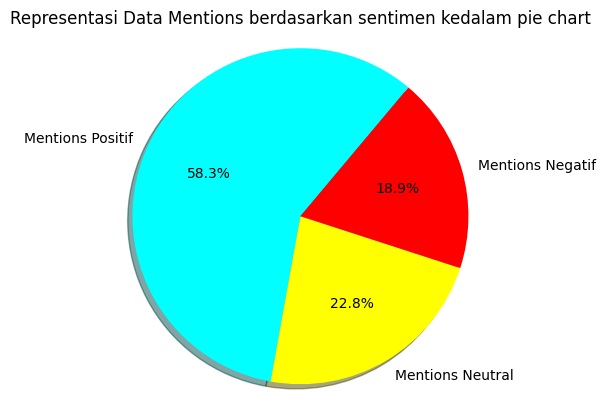

In [20]:
my_labels = 'Mentions Positif','Mentions Neutral','Mentions Negatif'
my_colors = ['aqua','yellow','red']

my_explode = (0, 0, 0)
plt.pie(tweet_bar_df.values, labels=my_labels, autopct='%1.1f%%', startangle=50, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Representasi Data Mentions berdasarkan sentimen kedalam pie chart')
plt.axis('equal')

plt.show()

In [21]:
# Pisahkan kolom fitur dan target
X = df['Mentions_cleans']
y = df['Sentiment']

#**Tanpa Smote Tfidf**

#Membagi data menjadi data training dan testing untuk melatih model algoritma 80:20

In [25]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split( X, y, test_size=0.2, random_state = 37)
Train_X.shape, Test_X.shape, Train_Y.shape, Test_Y.shape

((1474,), (369,), (1474,), (369,))

In [26]:
# Word Vectorization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(X)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#Menggunakan SVM untuk memprediksi hasil



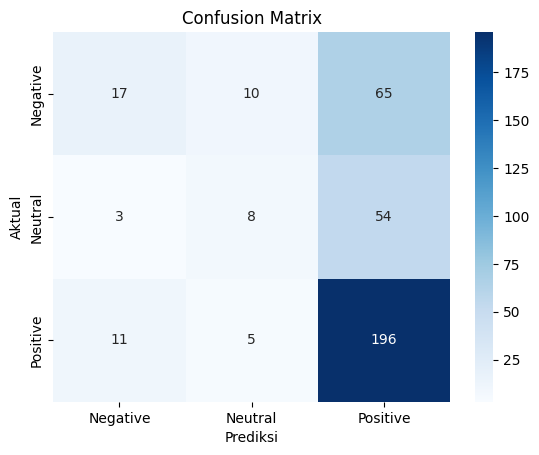

Accuracy Score untuk Support Vector Machine Model ::  59.891598915989164
              precision    recall  f1-score   support

    Negative       0.55      0.18      0.28        92
     Neutral       0.35      0.12      0.18        65
    Positive       0.62      0.92      0.74       212

    accuracy                           0.60       369
   macro avg       0.51      0.41      0.40       369
weighted avg       0.56      0.60      0.53       369



In [27]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(Train_X_Tfidf, Train_Y)
svm_pred = svm.predict(Test_X_Tfidf)

cm = confusion_matrix(Test_Y, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(Test_Y, svm_pred)*100)
print(classification_report(Test_Y, svm_pred, zero_division=0))

#Membagi data menjadi data training dan testing untuk melatih model algoritma 70:30

In [28]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split( X, y, test_size=0.3, random_state = 37)
Train_X.shape, Test_X.shape, Train_Y.shape, Test_Y.shape

((1290,), (553,), (1290,), (553,))

In [29]:
# Word Vectorization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(X)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#Menggunakan SVM untuk memprediksi hasil

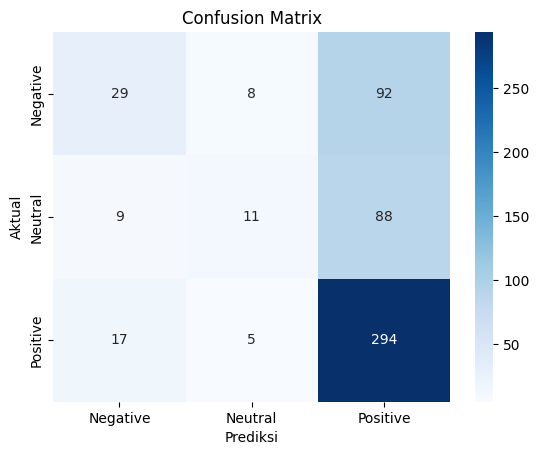

Accuracy Score untuk Support Vector Machine Model ::  60.397830018083184
              precision    recall  f1-score   support

    Negative       0.53      0.22      0.32       129
     Neutral       0.46      0.10      0.17       108
    Positive       0.62      0.93      0.74       316

    accuracy                           0.60       553
   macro avg       0.54      0.42      0.41       553
weighted avg       0.57      0.60      0.53       553



In [30]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(Train_X_Tfidf, Train_Y)
svm_pred = svm.predict(Test_X_Tfidf)

cm = confusion_matrix(Test_Y, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(Test_Y, svm_pred)*100)
print(classification_report(Test_Y, svm_pred, zero_division=0))

#Membagi data menjadi data training dan testing untuk melatih model algoritma 90:10

In [31]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split( X, y, test_size=0.1, random_state = 37)
Train_X.shape, Test_X.shape, Train_Y.shape, Test_Y.shape

((1658,), (185,), (1658,), (185,))

In [32]:
# Word Vectorization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(X)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#Menggunakan SVM untuk memprediksi hasil

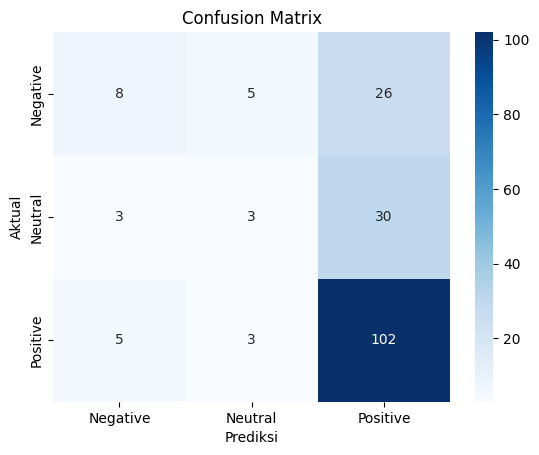

Accuracy Score untuk Support Vector Machine Model ::  61.08108108108108
              precision    recall  f1-score   support

    Negative       0.50      0.21      0.29        39
     Neutral       0.27      0.08      0.13        36
    Positive       0.65      0.93      0.76       110

    accuracy                           0.61       185
   macro avg       0.47      0.41      0.39       185
weighted avg       0.54      0.61      0.54       185



In [33]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(Train_X_Tfidf, Train_Y)
svm_pred = svm.predict(Test_X_Tfidf)

cm = confusion_matrix(Test_Y, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(Test_Y, svm_pred)*100)
print(classification_report(Test_Y, svm_pred, zero_division=0))

#**Tanpa Smote BOW**

#Membagi data menjadi data training dan testing untuk melatih model algoritma 70:30

In [35]:
Train_bow_X, Test_bow_X, Train_bow_Y, Test_bow_Y = model_selection.train_test_split( X, y, test_size=0.3, random_state = 37)
Train_bow_X.shape, Test_bow_X.shape, Train_bow_Y.shape, Test_bow_Y.shape

((1290,), (553,), (1290,), (553,))

In [36]:
# Word Vectorization
Bow_vect = CountVectorizer(max_features=5000)
Bow_vect.fit(X)
Train_X_Bow = Bow_vect.transform(Train_bow_X)
Test_X_Bow = Bow_vect.transform(Test_bow_X)

#Menggunakan SVM untuk memprediksi hasil

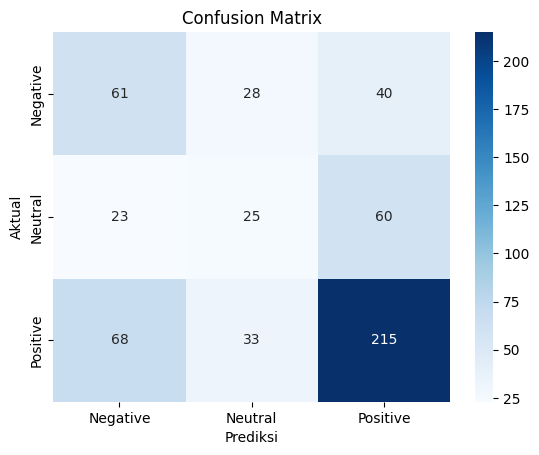

Accuracy Score untuk Support Vector Machine Model ::  54.43037974683544
              precision    recall  f1-score   support

    Negative       0.40      0.47      0.43       129
     Neutral       0.29      0.23      0.26       108
    Positive       0.68      0.68      0.68       316

    accuracy                           0.54       553
   macro avg       0.46      0.46      0.46       553
weighted avg       0.54      0.54      0.54       553



In [37]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(Train_X_Bow, Train_bow_Y)
svm_pred = svm.predict(Test_X_Bow)

cm = confusion_matrix(Test_bow_Y, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(Test_bow_Y, svm_pred)*100)
print(classification_report(Test_bow_Y, svm_pred, zero_division=0))

#Membagi data menjadi data training dan testing untuk melatih model algoritma 80:20

In [38]:
Train_bow_X, Test_bow_X, Train_bow_Y, Test_bow_Y = model_selection.train_test_split( X, y, test_size=0.2, random_state = 37)
Train_bow_X.shape, Test_bow_X.shape, Train_bow_Y.shape, Test_bow_Y.shape

((1474,), (369,), (1474,), (369,))

In [39]:
# Word Vectorization
Bow_vect = CountVectorizer(max_features=5000)
Bow_vect.fit(X)
Train_X_Bow = Bow_vect.transform(Train_bow_X)
Test_X_Bow = Bow_vect.transform(Test_bow_X)

#Menggunakan SVM untuk memprediksi hasil

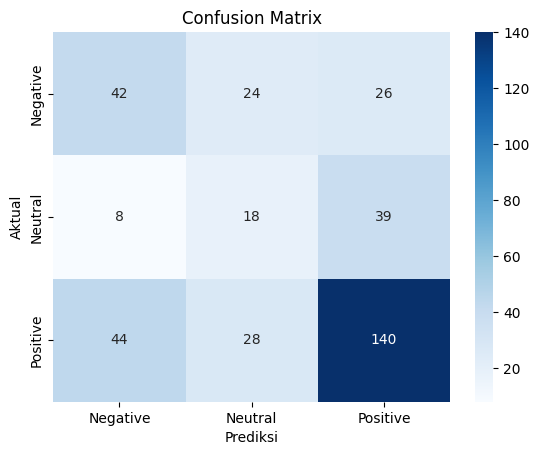

Accuracy Score untuk Support Vector Machine Model ::  54.20054200542005
              precision    recall  f1-score   support

    Negative       0.45      0.46      0.45        92
     Neutral       0.26      0.28      0.27        65
    Positive       0.68      0.66      0.67       212

    accuracy                           0.54       369
   macro avg       0.46      0.46      0.46       369
weighted avg       0.55      0.54      0.55       369



In [40]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(Train_X_Bow, Train_bow_Y)
svm_pred = svm.predict(Test_X_Bow)

cm = confusion_matrix(Test_bow_Y, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(Test_bow_Y, svm_pred)*100)
print(classification_report(Test_bow_Y, svm_pred, zero_division=0))

#Membagi data menjadi data training dan testing untuk melatih model algoritma 90:10

In [41]:
Train_bow_X, Test_bow_X, Train_bow_Y, Test_bow_Y = model_selection.train_test_split( X, y, test_size=0.1, random_state = 37)
Train_bow_X.shape, Test_bow_X.shape, Train_bow_Y.shape, Test_bow_Y.shape

((1658,), (185,), (1658,), (185,))

In [42]:
# Word Vectorization
Bow_vect = CountVectorizer(max_features=5000)
Bow_vect.fit(X)
Train_X_Bow = Bow_vect.transform(Train_bow_X)
Test_X_Bow = Bow_vect.transform(Test_bow_X)

#Menggunakan SVM untuk memprediksi hasil

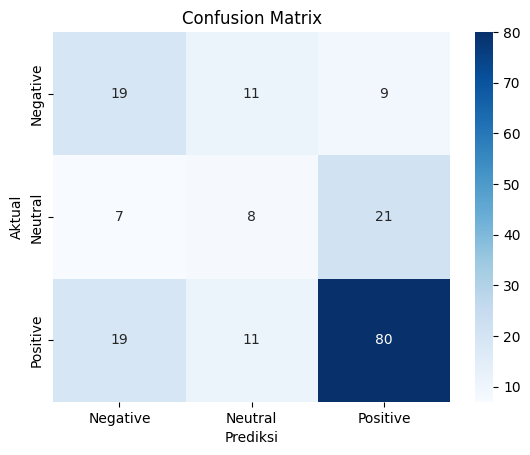

Accuracy Score untuk Support Vector Machine Model ::  57.83783783783784
              precision    recall  f1-score   support

    Negative       0.42      0.49      0.45        39
     Neutral       0.27      0.22      0.24        36
    Positive       0.73      0.73      0.73       110

    accuracy                           0.58       185
   macro avg       0.47      0.48      0.47       185
weighted avg       0.57      0.58      0.57       185



In [43]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(Train_X_Bow, Train_bow_Y)
svm_pred = svm.predict(Test_X_Bow)

cm = confusion_matrix(Test_bow_Y, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(Test_bow_Y, svm_pred)*100)
print(classification_report(Test_bow_Y, svm_pred, zero_division=0))

#Pembobotan kata dengan TF-IDF menggunakan library TfidfVectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
tf_idf.fit(X)

X_tf_idf = tf_idf.transform(X).toarray()

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaaaaahhhhhh,aaaaaayaa,aaaaaayaaaaya,aaaaayaa,aaaaku,...,yups,yuzuha,yzvous,zalina,zaman,zeke,zetsu,zina,znya,zodiak
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1839,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1840,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1841,0.0,0.240077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#**Menerapkan SMOTE untuk oversampling**

In [44]:
from imblearn.over_sampling import SMOTE

# Menerapkan SMOTE untuk oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_tf_idf, y)

# Menampilkan informasi sebelum dan sesudah oversampling
print("Jumlah sampel sebelum oversampling:", X.shape[0])
print("Jumlah sampel setelah oversampling:", X_resampled.shape[0])

Jumlah sampel sebelum oversampling: 1843
Jumlah sampel setelah oversampling: 3222


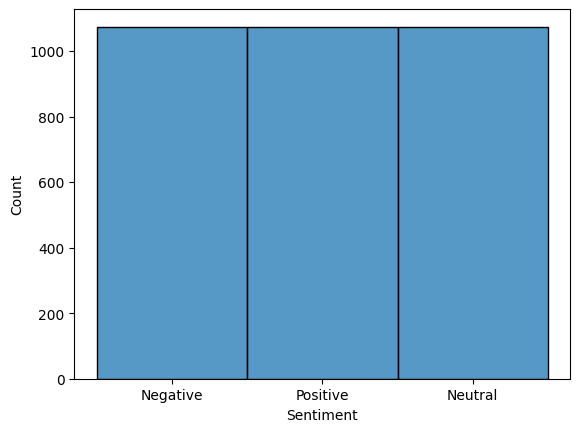

In [45]:
fig = plt.subplots()

sns.histplot(data=y_resampled)

plt.show()

#Membagi data menjadi data training dan testing untuk melatih model algoritma 80:20

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 37)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2577, 5649), (645, 5649), (2577,), (645,))

#Menggunakan SVM untuk accuracy

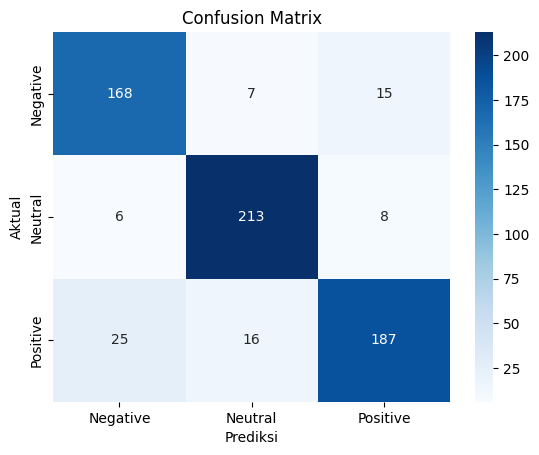

Accuracy Score untuk Support Vector Machine Model ::  88.06201550387597
              precision    recall  f1-score   support

    Negative       0.84      0.88      0.86       190
     Neutral       0.90      0.94      0.92       227
    Positive       0.89      0.82      0.85       228

    accuracy                           0.88       645
   macro avg       0.88      0.88      0.88       645
weighted avg       0.88      0.88      0.88       645



In [47]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(y_test, svm_pred)*100)
print(classification_report(y_test, svm_pred, zero_division=0))

#Membagi data menjadi data training dan testing untuk melatih model algoritma 70:30

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 37)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2255, 5649), (967, 5649), (2255,), (967,))

#Menggunakan SVM untuk accuracy

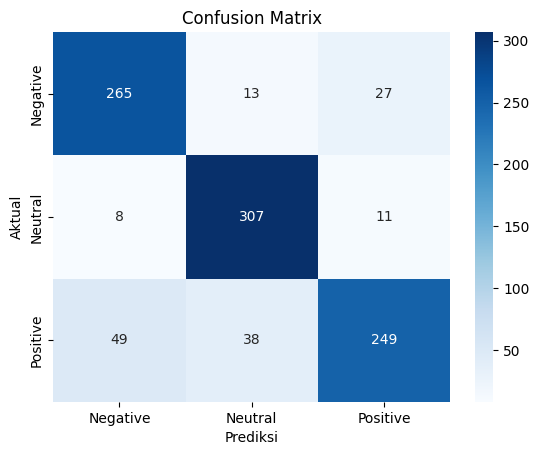

Accuracy Score untuk Support Vector Machine Model ::  84.90175801447776
              precision    recall  f1-score   support

    Negative       0.82      0.87      0.85       305
     Neutral       0.86      0.94      0.90       326
    Positive       0.87      0.74      0.80       336

    accuracy                           0.85       967
   macro avg       0.85      0.85      0.85       967
weighted avg       0.85      0.85      0.85       967



In [49]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(y_test, svm_pred)*100)
print(classification_report(y_test, svm_pred, zero_division=0))

#Membagi data menjadi data training dan testing untuk melatih model algoritma 90:10

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.1, random_state = 37)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2899, 5649), (323, 5649), (2899,), (323,))

#Menggunakan SVM untuk accuracy

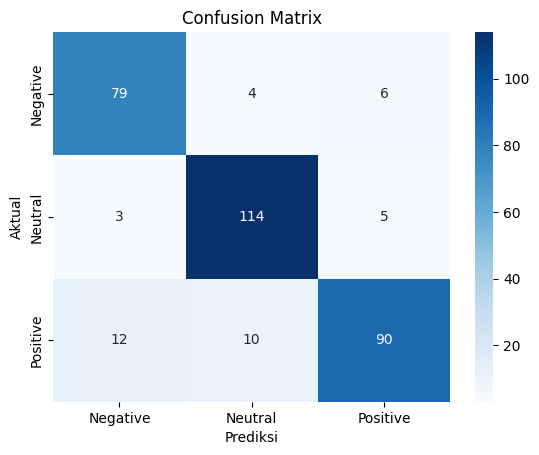

Accuracy Score untuk Support Vector Machine Model ::  87.61609907120743
              precision    recall  f1-score   support

    Negative       0.84      0.89      0.86        89
     Neutral       0.89      0.93      0.91       122
    Positive       0.89      0.80      0.85       112

    accuracy                           0.88       323
   macro avg       0.87      0.88      0.87       323
weighted avg       0.88      0.88      0.88       323



In [51]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(y_test, svm_pred)*100)
print(classification_report(y_test, svm_pred, zero_division=0))

#**Menerapkan SMOTE untuk undersampling**




In [52]:
from imblearn.under_sampling import RandomUnderSampler

# Menerapkan SMOTE untuk undersampling
under = RandomUnderSampler()
Resampled_X, Resampled_y = under.fit_resample(X_tf_idf, y)

# Menampilkan informasi sebelum dan sesudah undersampling
print("Jumlah sampel sebelum undersampling:", X.shape[0])
print("Jumlah sampel setelah undersampling:", Resampled_X.shape[0])

Jumlah sampel sebelum undersampling: 1843
Jumlah sampel setelah undersampling: 1044


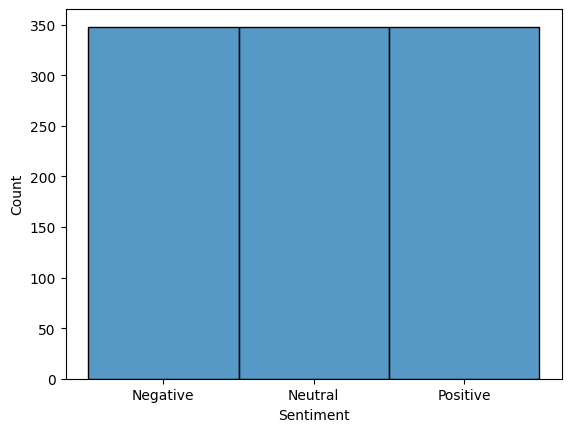

In [53]:
fig = plt.subplots()

sns.histplot(data=Resampled_y)

plt.show()

#Membagi data menjadi data training dan testing untuk melatih model algoritma 80:20

In [54]:
from sklearn.model_selection import train_test_split

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(Resampled_X, Resampled_y, test_size = 0.2, random_state = 37)
X_train_under.shape, X_test_under.shape, y_train_under.shape, y_test_under.shape

((835, 5649), (209, 5649), (835,), (209,))

#Menggunakan SVM untuk accuracy

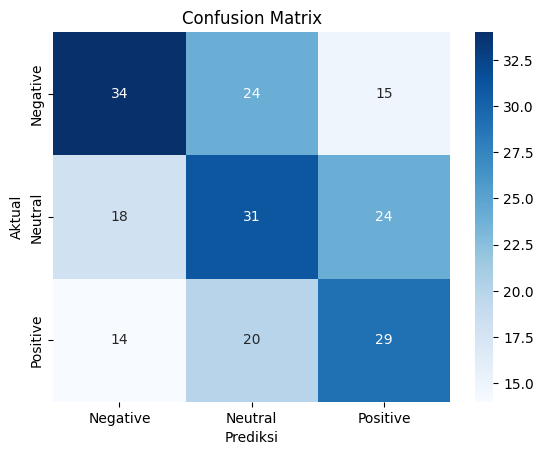

Accuracy Score untuk Support Vector Machine Model ::  44.97607655502392
              precision    recall  f1-score   support

    Negative       0.52      0.47      0.49        73
     Neutral       0.41      0.42      0.42        73
    Positive       0.43      0.46      0.44        63

    accuracy                           0.45       209
   macro avg       0.45      0.45      0.45       209
weighted avg       0.45      0.45      0.45       209



In [55]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(X_train_under, y_train_under)
svm_pred = svm.predict(X_test_under)

cm = confusion_matrix(y_test_under, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(y_test_under, svm_pred)*100)
print(classification_report(y_test_under, svm_pred, zero_division=0))

#Membagi data menjadi data training dan testing untuk melatih model algoritma 70:30

In [56]:
from sklearn.model_selection import train_test_split

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(Resampled_X, Resampled_y, test_size = 0.3, random_state = 37)
X_train_under.shape, X_test_under.shape, y_train_under.shape, y_test_under.shape

((730, 5649), (314, 5649), (730,), (314,))

#Menggunakan SVM untuk accuracy

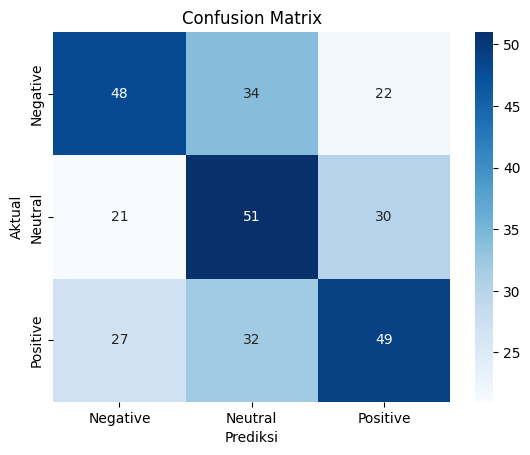

Accuracy Score untuk Support Vector Machine Model ::  47.13375796178344
              precision    recall  f1-score   support

    Negative       0.50      0.46      0.48       104
     Neutral       0.44      0.50      0.47       102
    Positive       0.49      0.45      0.47       108

    accuracy                           0.47       314
   macro avg       0.47      0.47      0.47       314
weighted avg       0.47      0.47      0.47       314



In [57]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(X_train_under, y_train_under)
svm_pred = svm.predict(X_test_under)

cm = confusion_matrix(y_test_under, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(y_test_under, svm_pred)*100)
print(classification_report(y_test_under, svm_pred, zero_division=0))

#Membagi data menjadi data training dan testing untuk melatih model algoritma 90:10

In [58]:
from sklearn.model_selection import train_test_split

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(Resampled_X, Resampled_y, test_size = 0.1, random_state = 37)
X_train_under.shape, X_test_under.shape, y_train_under.shape, y_test_under.shape

((939, 5649), (105, 5649), (939,), (105,))

#Menggunakan SVM untuk accuracy

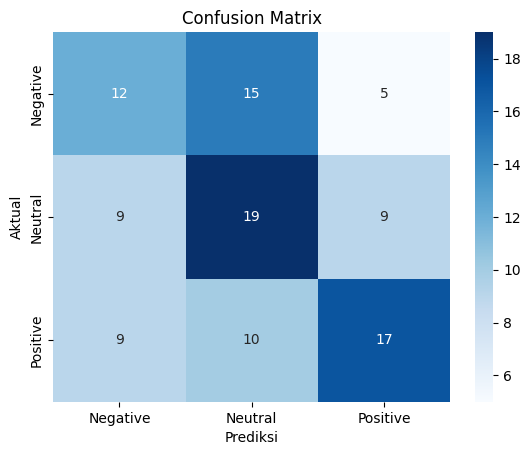

Accuracy Score untuk Support Vector Machine Model ::  45.714285714285715
              precision    recall  f1-score   support

    Negative       0.40      0.38      0.39        32
     Neutral       0.43      0.51      0.47        37
    Positive       0.55      0.47      0.51        36

    accuracy                           0.46       105
   macro avg       0.46      0.45      0.45       105
weighted avg       0.46      0.46      0.46       105



In [59]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(X_train_under, y_train_under)
svm_pred = svm.predict(X_test_under)

cm = confusion_matrix(y_test_under, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(y_test_under, svm_pred)*100)
print(classification_report(y_test_under, svm_pred, zero_division=0))

#Pembobotan kata dengan BOW menggunakan library CountVectorizer

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer()
bow.fit(X)

X_bow = bow.transform(X).toarray()

data_bow = pd.DataFrame(X_bow, columns=bow.get_feature_names_out())
data_bow

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaaaaahhhhhh,aaaaaayaa,aaaaaayaaaaya,aaaaayaa,aaaaku,...,yups,yuzuha,yzvous,zalina,zaman,zeke,zetsu,zina,znya,zodiak
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1841,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Menerapkan SMOTE untuk oversampling**

In [60]:
from imblearn.over_sampling import SMOTE

# Menerapkan SMOTE untuk oversampling
smote = SMOTE()
X_resampled_bow, y_resampled_bow = smote.fit_resample(X_bow, y)

# Menampilkan informasi sebelum dan sesudah oversampling
print("Jumlah sampel sebelum oversampling:", X.shape[0])
print("Jumlah sampel setelah oversampling:", X_resampled_bow.shape[0])

Jumlah sampel sebelum oversampling: 1843
Jumlah sampel setelah oversampling: 3222


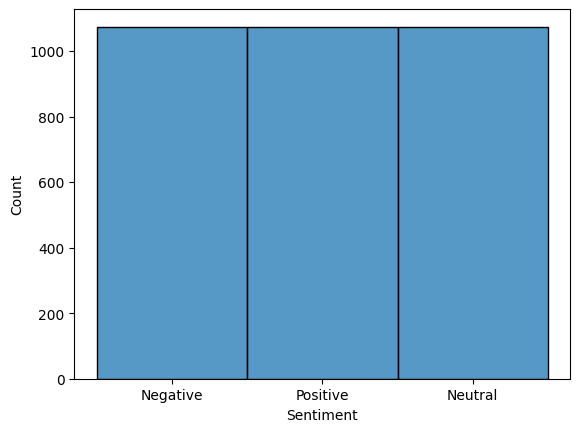

In [61]:
fig = plt.subplots()

sns.histplot(data=y_resampled_bow)

plt.show()

#Membagi data menjadi data training dan testing untuk melatih model algoritma 80:20

In [62]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_resampled_bow, y_resampled_bow, test_size = 0.2, random_state = 37)
X_train_bow.shape, X_test_bow.shape, y_train_bow.shape, y_test_bow.shape

((2577, 5649), (645, 5649), (2577,), (645,))

#Menggunakan SVM untuk accuracy

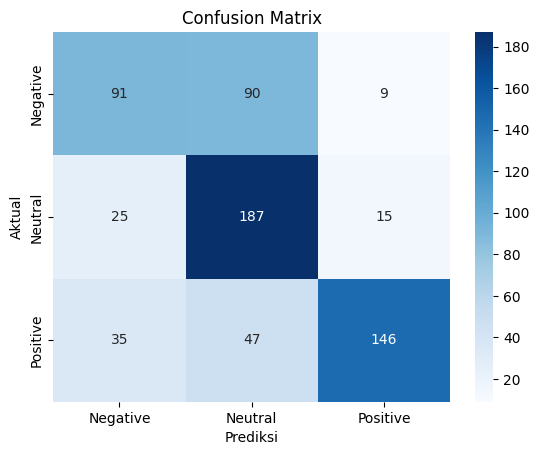

Accuracy Score untuk Support Vector Machine Model ::  65.73643410852713
              precision    recall  f1-score   support

    Negative       0.60      0.48      0.53       190
     Neutral       0.58      0.82      0.68       227
    Positive       0.86      0.64      0.73       228

    accuracy                           0.66       645
   macro avg       0.68      0.65      0.65       645
weighted avg       0.68      0.66      0.66       645



In [63]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(X_train_bow, y_train_bow)
svm_pred = svm.predict(X_test_bow)

cm = confusion_matrix(y_test_bow, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(y_test_bow, svm_pred)*100)
print(classification_report(y_test_bow, svm_pred, zero_division=0))

#Membagi data menjadi data training dan testing untuk melatih model algoritma 70:30

In [64]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_resampled_bow, y_resampled_bow, test_size = 0.3, random_state = 37)
X_train_bow.shape, X_test_bow.shape, y_train_bow.shape, y_test_bow.shape

((2255, 5649), (967, 5649), (2255,), (967,))

#Menggunakan SVM untuk accuracy

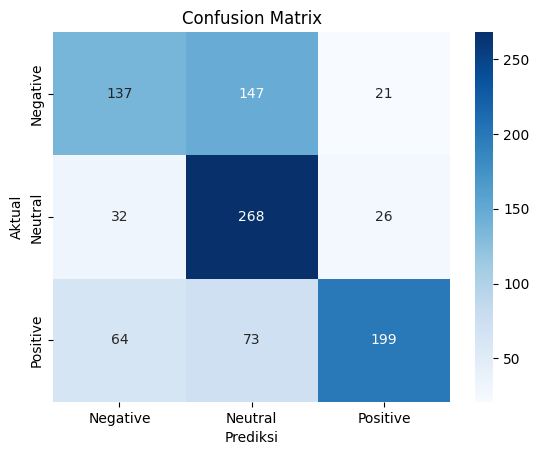

Accuracy Score untuk Support Vector Machine Model ::  62.46122026887281
              precision    recall  f1-score   support

    Negative       0.59      0.45      0.51       305
     Neutral       0.55      0.82      0.66       326
    Positive       0.81      0.59      0.68       336

    accuracy                           0.62       967
   macro avg       0.65      0.62      0.62       967
weighted avg       0.65      0.62      0.62       967



In [65]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(X_train_bow, y_train_bow)
svm_pred = svm.predict(X_test_bow)

cm = confusion_matrix(y_test_bow, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(y_test_bow, svm_pred)*100)
print(classification_report(y_test_bow, svm_pred, zero_division=0))

#Membagi data menjadi data training dan testing untuk melatih model algoritma 90:10

In [66]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_resampled_bow, y_resampled_bow, test_size = 0.1, random_state = 37)
X_train_bow.shape, X_test_bow.shape, y_train_bow.shape, y_test_bow.shape

((2899, 5649), (323, 5649), (2899,), (323,))

#Menggunakan SVM untuk accuracy

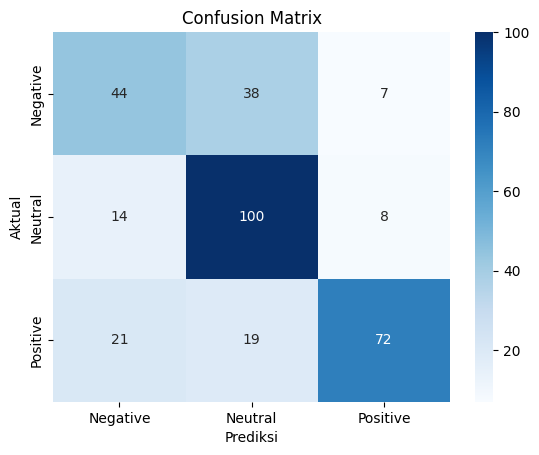

Accuracy Score untuk Support Vector Machine Model ::  66.87306501547987
              precision    recall  f1-score   support

    Negative       0.56      0.49      0.52        89
     Neutral       0.64      0.82      0.72       122
    Positive       0.83      0.64      0.72       112

    accuracy                           0.67       323
   macro avg       0.67      0.65      0.65       323
weighted avg       0.68      0.67      0.67       323



In [67]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(X_train_bow, y_train_bow)
svm_pred = svm.predict(X_test_bow)

cm = confusion_matrix(y_test_bow, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(y_test_bow, svm_pred)*100)
print(classification_report(y_test_bow, svm_pred, zero_division=0))

#**Menerapkan SMOTE untuk undersampling**

In [68]:
from imblearn.under_sampling import RandomUnderSampler

# Menerapkan SMOTE untuk undersampling
under = RandomUnderSampler()
X_resampled_bow, y_resampled_bow = under.fit_resample(X_bow, y)

# Menampilkan informasi sebelum dan sesudah undeersampling
print("Jumlah sampel sebelum undersampling:", X.shape[0])
print("Jumlah sampel setelah underersampling:", X_resampled_bow.shape[0])

Jumlah sampel sebelum undersampling: 1843
Jumlah sampel setelah underersampling: 1044


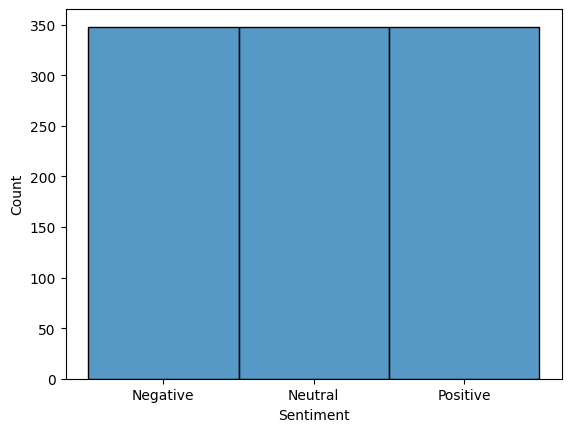

In [69]:
fig = plt.subplots()

sns.histplot(data=y_resampled_bow)

plt.show()

#Membagi data menjadi data training dan testing untuk melatih model algoritma 70:30

In [70]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_resampled_bow, y_resampled_bow, test_size = 0.3, random_state = 37)
X_train_bow.shape, X_test_bow.shape, y_train_bow.shape, y_test_bow.shape

((730, 5649), (314, 5649), (730,), (314,))

#Menggunakan SVM untuk accuracy

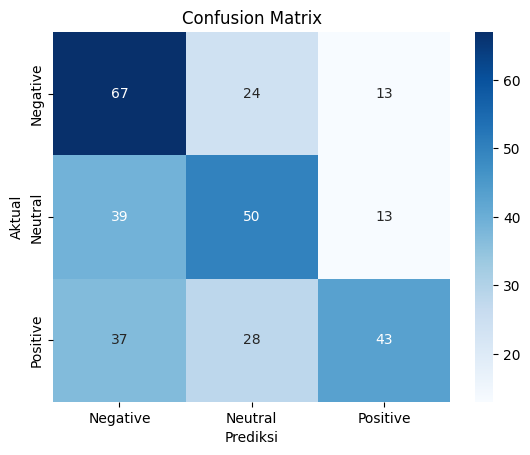

Accuracy Score untuk Support Vector Machine Model ::  50.955414012738856
              precision    recall  f1-score   support

    Negative       0.47      0.64      0.54       104
     Neutral       0.49      0.49      0.49       102
    Positive       0.62      0.40      0.49       108

    accuracy                           0.51       314
   macro avg       0.53      0.51      0.51       314
weighted avg       0.53      0.51      0.51       314



In [71]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(X_train_bow, y_train_bow)
svm_pred = svm.predict(X_test_bow)

cm = confusion_matrix(y_test_bow, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(y_test_bow, svm_pred)*100)
print(classification_report(y_test_bow, svm_pred, zero_division=0))

#Membagi data menjadi data training dan testing untuk melatih model algoritma 80:20

In [72]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_resampled_bow, y_resampled_bow, test_size = 0.2, random_state = 37)
X_train_bow.shape, X_test_bow.shape, y_train_bow.shape, y_test_bow.shape

((835, 5649), (209, 5649), (835,), (209,))

#Menggunakan SVM untuk accuracy

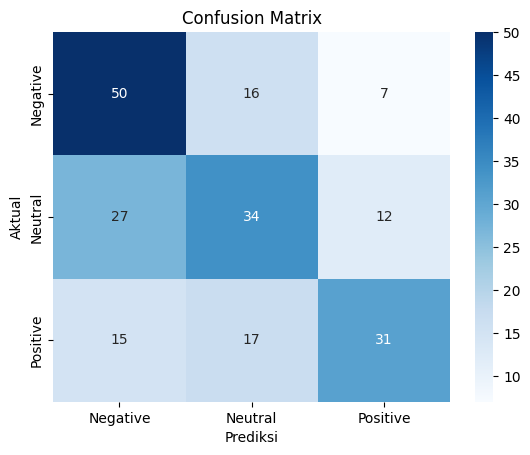

Accuracy Score untuk Support Vector Machine Model ::  55.02392344497608
              precision    recall  f1-score   support

    Negative       0.54      0.68      0.61        73
     Neutral       0.51      0.47      0.49        73
    Positive       0.62      0.49      0.55        63

    accuracy                           0.55       209
   macro avg       0.56      0.55      0.55       209
weighted avg       0.55      0.55      0.55       209



In [73]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(X_train_bow, y_train_bow)
svm_pred = svm.predict(X_test_bow)

cm = confusion_matrix(y_test_bow, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(y_test_bow, svm_pred)*100)
print(classification_report(y_test_bow, svm_pred, zero_division=0))

#Membagi data menjadi data training dan testing untuk melatih model algoritma 90:10

In [74]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_resampled_bow, y_resampled_bow, test_size = 0.1, random_state = 37)
X_train_bow.shape, X_test_bow.shape, y_train_bow.shape, y_test_bow.shape

((939, 5649), (105, 5649), (939,), (105,))

#Menggunakan SVM untuk accuracy

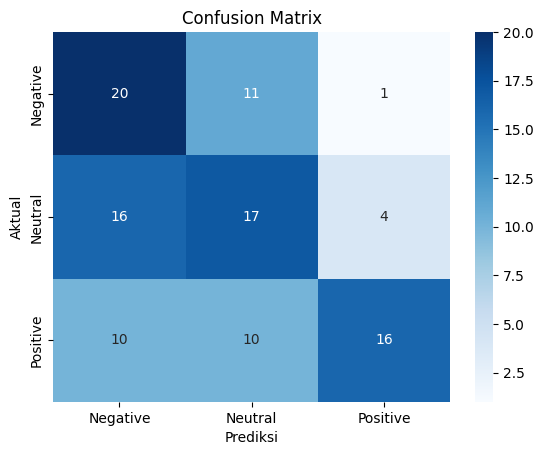

Accuracy Score untuk Support Vector Machine Model ::  50.476190476190474
              precision    recall  f1-score   support

    Negative       0.43      0.62      0.51        32
     Neutral       0.45      0.46      0.45        37
    Positive       0.76      0.44      0.56        36

    accuracy                           0.50       105
   macro avg       0.55      0.51      0.51       105
weighted avg       0.55      0.50      0.51       105



In [75]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100, probability=True)
svm.fit(X_train_bow, y_train_bow)
svm_pred = svm.predict(X_test_bow)

cm = confusion_matrix(y_test_bow, svm_pred)
label_names = np.unique(y)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score untuk Support Vector Machine Model :: ", accuracy_score(y_test_bow, svm_pred)*100)
print(classification_report(y_test_bow, svm_pred, zero_division=0))